In [211]:
#Import relevant packages
import numpy as np
import sympy as sm
from sympy import symbols, Eq, solve
from scipy.optimize import fsolve
import math
import matplotlib.pyplot as plt

In [212]:
#For pretty printing
sm.init_printing(use_unicode=True)

In [213]:
par = {}

par['alpha'] = 5.76
par['h'] = 0.5
par['b'] = 0.5
par['phi'] = 0
par['gamma'] = 0.075

In [214]:
#Define symbols
v_t = sm.symbols('v_t')
v_lag = sm.symbols('v_t-1')
y_t = sm.symbols('y_t')
y_lag = sm.symbols('y_t-1')
pi_t = sm.symbols('pi_t')
pi_lag = sm.symbols('pi_t-1')
s_t = sm.symbols('s_t')
s_lag = sm.symbols('s_t-1')
alpha = sm.symbols('alpha')
h = sm.symbols('h')
b = sm.symbols('b')
phi = sm.symbols('phi')
gamma = sm.symbols('gamma')
x_t = sm.symbols('x_t')
c_t = sm.symbols('c_t')

In [215]:
#Define the AD- and the SRAS-curve
AD = sm.Eq(pi_t, (1/(h*alpha))*(v_t-(1+b*alpha)*y_t))
SRAS = sm.Eq(pi_t, (pi_lag+gamma*y_t-phi*gamma*y_lag+s_t-phi*s_lag))
AD, SRAS

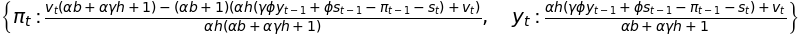

In [216]:
#Solve equilibrium
EQ = sm.solve((AD, SRAS), (pi_t,y_t))

#Display result
EQ

In [217]:
#Vi skal finde ud af, om vi også vil vise den numeriske løsning her.

In [218]:
#Use previously given parameter values
alpha = par['alpha']
h = par['h']
b = par['b']
phi = par['phi']
gamma = par['gamma']

**Question 2:** Find and illustrate the equilibrium when $y_{t-1} = \pi_{t-1} = v_t = s_t = s_{t-1} = 0$. Illustrate how the equilibrium changes when instead $v_t = 0.1$.

In [219]:
#Define new AD-curve and SRAS-curve according to the new values for the variables
_AD = sm.Eq(pi_t, ((-1/h*alpha)*((1+b*alpha*y_t)))
_SRAS = sm.Eq(pi_t, (gamma*y_t))

SyntaxError: invalid syntax (<ipython-input-219-88cb82ef8340>, line 3)

In [220]:
#Solve the new equilibrium
_EQ = sm.solve((_AD, _SRAS), (pi_t, y_t))

#Display result
_EQ

In [221]:
#Set v_t equal to 0.1
v_t = 0.1

#Define the AD-curve according to new value for the demand disturbance
newAD = sm.Eq(pi_t, ((1/h*alpha)*(v_t-(1+b*alpha)*y_t)))

#Solve the new equilibrium
newEQ = sm.solve((newAD, _SRAS), (pi_t, y_t))

#Display result
newEQ

In [222]:
#Defining functions in order to display result graphically
def SRAS(y_t):
    return gamma*y_t
    
def AD(y_t):
    return (-1/h*alpha)*((1+b*alpha)*y_t)

def newAD(y_t):
    return (1/h*alpha)*(v_t-(1+b*alpha)*y_t)

# Create best response to multiple q values
x = np.linspace(-0.05,0.05,100)
SRAS = SRAS(x)
y = np.linspace(-0.05,0.05,100)
AD = AD(y)
z = np.linspace(-0.05,0.05,100)
newAD = newAD(z)

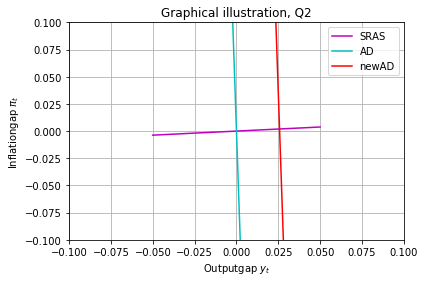

In [223]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(x,SRAS,"m",label='SRAS')
ax.plot(y,AD,"c",label='AD')
ax.plot(z,newAD,"r",label='newAD')
ax.legend()
ax.grid()
ax.set_xlabel('Outputgap $y_t$')
ax.set_ylabel('Inflationgap $\pi_t$')
ax.set_title('Graphical illustration, Q2')
ax.set_xlim([-0.1,0.1])
ax.set_ylim([-0.1,0.1]);

<function matplotlib.pyplot.show(*args, **kw)>

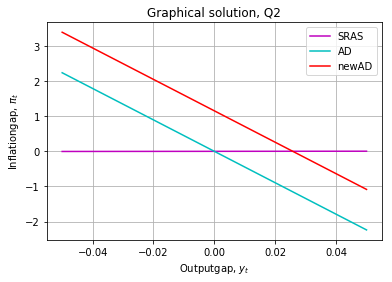

In [224]:

# Plot results
plt.plot(x,SRAS,"m",label='SRAS')
plt.plot(y,AD,"c",label='AD')
plt.plot(z,newAD,"r",label='newAD')
plt.legend()
plt.xlabel('Outputgap, $y_t$')
plt.ylabel('Inflationgap, $\pi_t$')
plt.title('Graphical solution, Q2')
plt.grid()
plt.show


#### Jeg kunne godt tænke mig at rangen på y-aksen er mindre, så SRAS-kurven ikke ligner den er lig 0
### Men det er som om jeg ikke rigtig kan få det fikset
### Hvis én vil kigge på det, vil det være fedt!

**Persistent disturbances:** Now, additionaly, assume that both the demand and the supply disturbances are AR(1) processes

$$ v_{t} = \delta v_{t-1} + x_{t} $$
$$ s_{t} = \omega s_{t-1} + c_{t} $$

where $x_{t}$ is a **demand shock**, and $c_t$ is a **supply shock**. The **autoregressive parameters** are:

In [225]:
par['delta'] = 0.80
par['omega'] = 0.15

**Question 3:** Starting from $y_{-1} = \pi_{-1} = s_{-1} = 0$, how does the economy evolve for $x_0 = 0.1$, $x_t = 0, \forall t > 0$ and $c_t = 0, \forall t \geq 0$?

In [230]:
#Define disturbances

def v_t(v_lag, x_t):
    return par['delta']*v_lag+x_t

def s_t(s_lag,c_t):
    return par['omega']*s_lag+c_t